**Datasets can be downloaded from https://www.dropbox.com/sh/dfqht1ob89ku99d/AACI5ZW3aRuq9MhBfSNS_1O_a?dl=0**  
Ref: Nestorowa, S. et al. A single-cell resolution map of mouse hematopoietic stem and progenitor cell differentiation. Blood 128, e20-31 (2016).

In [1]:
%matplotlib inline

In [2]:
import stream as st

In [3]:
st.__version__

'0.3.9'

### Read in data

In [4]:
import pickle


with open('/net/waxman-server/mnt/data/waxmanlabvm_home/kkarri/NASH/analysis/stream_result/stream_result.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
adata=st.read(file_name='./data_Nestorowa.tsv.gz')

Using default working directory.
Saving results in: /Users/huidong/Projects/Github/STREAM/tutorial/stream_result


In [7]:
adata=st.read(file_name='/net/waxman-server/mnt/data/waxmanlabvm_home/kkarri/NASH/data/Chow1/Chow_1_Test/outs/stream/matrix.mtx',file_format='mtx')
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/net/waxman-server/mnt/data/waxmanlabvm_home/kkarri/NASH/data/Chow1/Chow_1_Test/outs/stream/genes.tsv
/net/waxman-server/mnt/data/waxmanlabvm_home/kkarri/NASH/data/Chow1/Chow_1_Test/outs/stream/barcodes.tsv
Using default working directory.
Saving results in: /net/waxman-server/mnt/data/waxmanlabvm_home/kkarri/NASH/analysis/stream_result


To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:  
(Make sure **'genes.tsv'** and **'barcodes.tsv'** are under the same folder as **'matrix.mtx'**)  

```python
adata=st.read(file_name='./filtered_gene_bc_matrices/hg19/matrix.mtx',file_format='mtx')
```

In [8]:
st.add_cell_labels(adata)
st.add_cell_colors(adata)

No cell label file is provided, 'unknown' is used as the default cell labels
No cell color file is provided, random color is generated for each cell label


#### read in cell labels and label color

if cell label file or cell color file is not provided, please simply run:

'unknown' will be added as the default label for all cells  
`st.add_cell_labels(adata)`

'random color will be generated for each cell label  
`st.add_cell_colors(adata)`

In [5]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

In [9]:
st.normalize_per_cell(adata)
st.log_transform(adata)
st.remove_mt_genes(adata)
st.filter_cells(adata)

remove mitochondrial genes:
['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb']
No filtering


#### other useful preprocessing steps when dealing with raw-count data

Normalize gene expression based on library size  
`st.normalize_per_cell(adata)`

Logarithmize gene expression  
`st.log_transform(adata)` 

Remove mitochondrial genes  
`st.remove_mt_genes(adata)`

Filter out cells  
`st.filter_cells(adata)` 

Filter out genes

In [10]:
st.filter_genes(adata,min_num_cells = max(5,int(round(adata.shape[0]*0.001))),
                min_pct_cells = None,expr_cutoff = 1)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
4803 cells, 15718 genes


In [11]:
st.select_variable_genes?

**check parameters**  
`st.select_variable_genes?`

Please check if the blue curve fits the points well.  
If not, try to lower the parameter **'loess_frac'** (By default, `loess_frac=0.1`) until the blue curve fits well.   

e.g. `st.select_variable_genes(adata,loess_frac=0.01)`

786 variable genes are selected


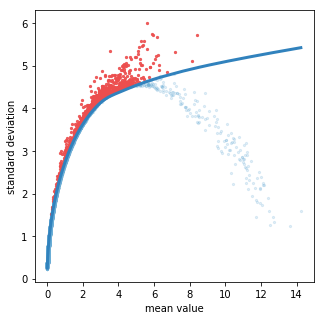

In [12]:
st.select_variable_genes(adata)

alternatively, user can also select top  principal components

`st.select_top_principal_components?`  
`st.select_top_principal_components(adata)`

using all the genes ...
15 PCs are selected


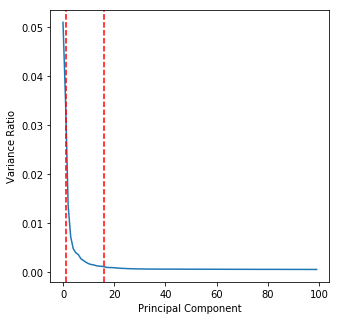

In [13]:
st.select_top_principal_components(adata)

In [17]:
st.dimension_reduction?

**check parameters**  
`st.dimension_reduction?`

Tips:

>by default `n_components =3`  
For biological process with simple bifurcation or linear trajectory, two components would be recommended  
e.g, `st.dimension_reduction(adata,n_components =2)`

>Several alternative dimension reduction methods are also supported, `se`(spectral embedding), `umap`, `pca`.  
by default, `method ='mlle'`.  
- For **large dataset**, `se`(Spectral Embedding) works faster than MLLE while preserving the similar compact structure to **MLLE**.  
e.g. `st.dimension_reduction(adata,method ='se')`
- For **large dataset**, lowering the percentage of neighbors (`nb_pct=0.1` by default) will speed up this step  
e.g, `st.dimension_reduction(adata,nb_pct =0.01)`

In [14]:
st.dimension_reduction(adata)

feature var_genes is being used ...
16 cpus are being used ...


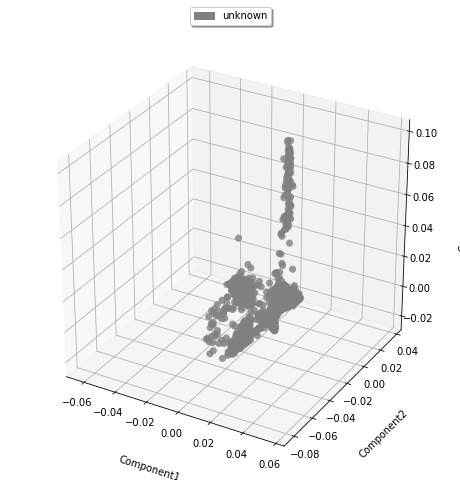

In [15]:
st.plot_dimension_reduction(adata)

**check parameters**  
`st.plot_visualization_2D?`

Tips:  
> Before the downstream **elastic principal graph learning**, it is important to visualize the top components in 2D plane with **UMAP** (by default) or **tSNE**(`st.plot_visualization_2D(adata,method='tsne')`) to confirm the existence of meaningful biological trajectory pattern 

/restricted/projectnb/waxmanlab/environment/.conda/envs/myenv/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../restricted/projectnb/waxmanlab/environment/.conda/envs/myenv/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/restricted/projectnb/waxmanlab/environment/.conda/envs/myenv/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba

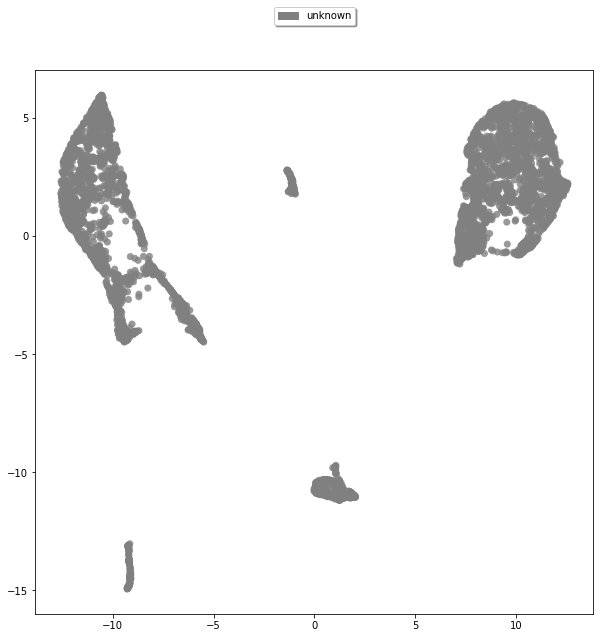

In [16]:
st.plot_visualization_2D(adata)

**check parameters**  
`st.seed_elastic_principal_graph?`

Tips:
>To better scale up STREAM to large datasets, since **version 0.3.8**, the default **clustering method** has been changed from **'ap'** (affinity propagation) to **'kmeans'**. Users can specify `clustering = 'ap'` to reproduce the analyses in STREAM paper:  
i.e. `st.seed_elastic_principal_graph(adata,clustering='ap')`

>If cells form a big bulk in MLLE space, **'ap'** may generate too many branches.   
In that case, try `clustering = 'kmeans'` or `clustering = 'sc'` to avoid a too complex initial strcuture

>For noisy dataset, **spectral clustering** is proved to work better to get rid of noisy branches  
e.g. `st.seed_elastic_principal_graph(adata,clustering='sc',n_clusters=10)`

In [18]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


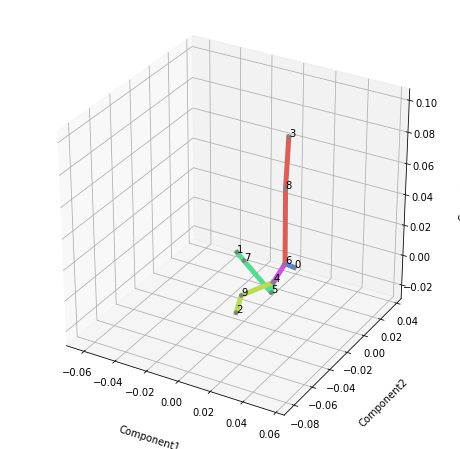

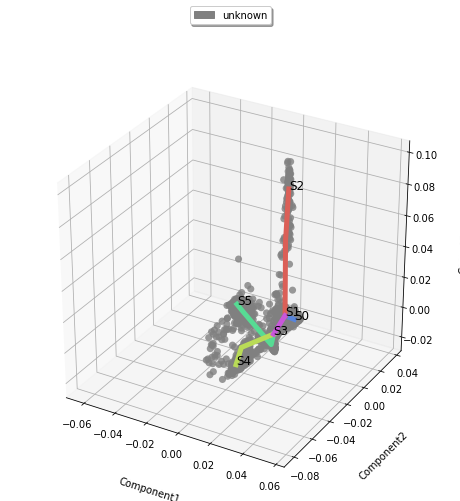

In [19]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

**check parameters**  
`st.elastic_principal_graph?`

Tips:  
- Increase the parameter **'epg_alpha'** will help control spurious branches(by default `epg_alpha=0.02`)  
e.g. `st.elastic_principal_graph(adata,epg_alpha=0.03)`  


- Add **'epg_trimmingradius'** will help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [20]:
st.elastic_principal_graph(adata)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4803 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
2.755e-05
	
50
	
49
	
42
	
3
	
0
	
0
	
1.12e-05
	
1.068e-05
	
0.9821
	
0.9829
	
1.519e-05
	
1.15e-06
	
5.748e-05
	
0.002874
	
0


23.088 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


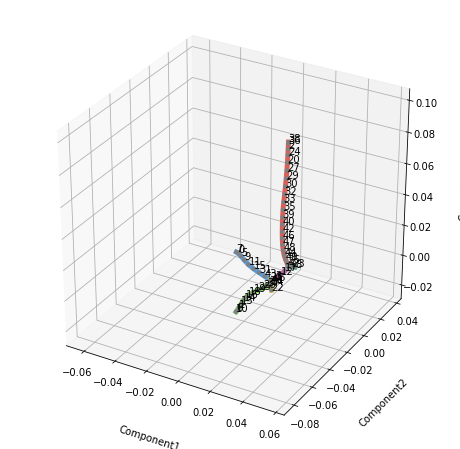

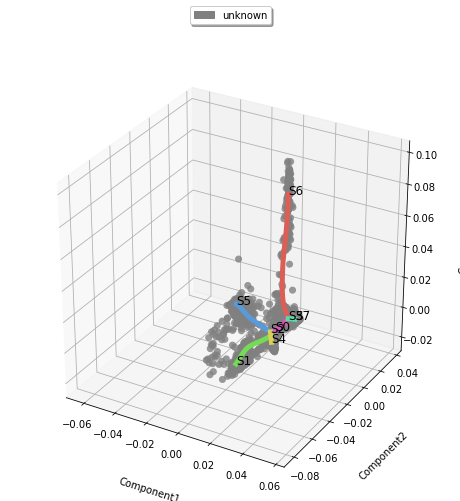

In [21]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Tips:  
- Add **'epg_trimmingradius'** will help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.optimize_branching(adata,epg_trimmingradius=0.1)`  

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 4803 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||80
	
1.475e-05
	
80
	
79
	
72
	
3
	
0
	
0
	
7.675e-06
	
7.424e-06
	
0.9877
	
0.9881
	
6.161e-06
	
9.12e-07
	
7.296e-05
	
0.005837
	
0


6.507 sec elapsed

Number of branches after optimizing branching: 7


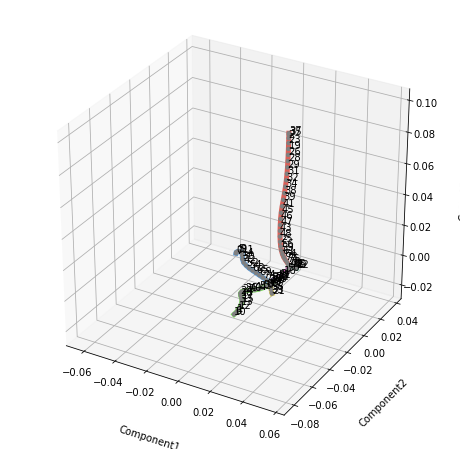

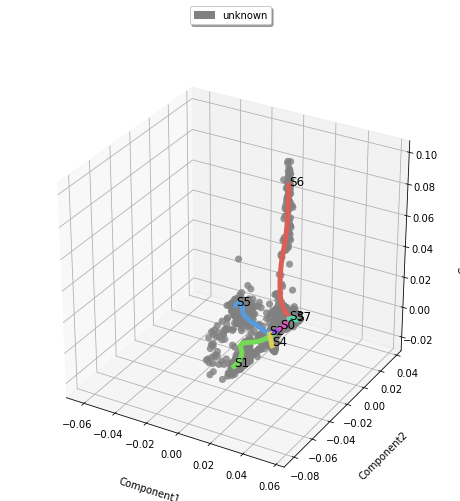

In [22]:
### optional step
st.optimize_branching(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Other optional steps:

- Prune branches:  
`st.prune_elastic_principal_graph?`  
`st.prune_elastic_principal_graph(adata)`


- Shift branching node:  
`st.shift_branching?`  
`st.shift_branching(adata)`

**check parameters**  
`st.extend_elastic_principal_graph?`  

Tips:  
- Add **'epg_trimmingradius'** will help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.extend_elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

Extending leaves with additional nodes ...
Number of branches after extending leaves: 7


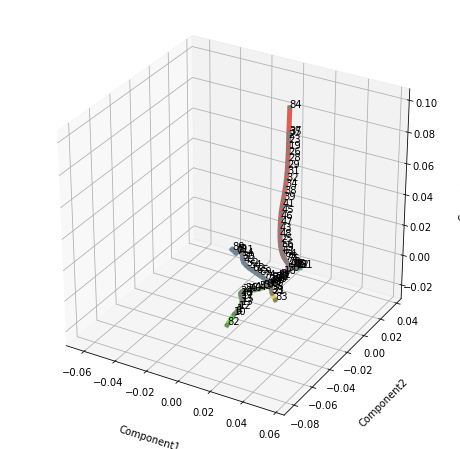

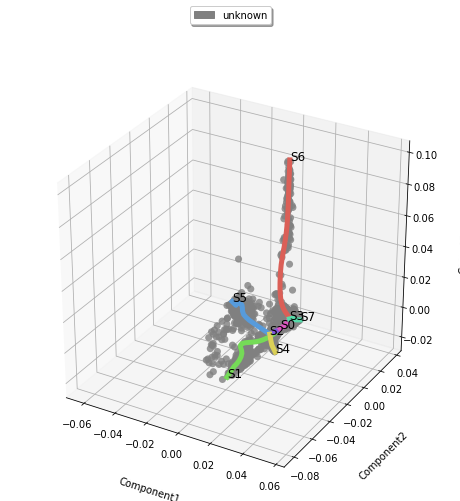

In [23]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/restricted/projectnb/waxmanlab/environment/.conda/envs/myenv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


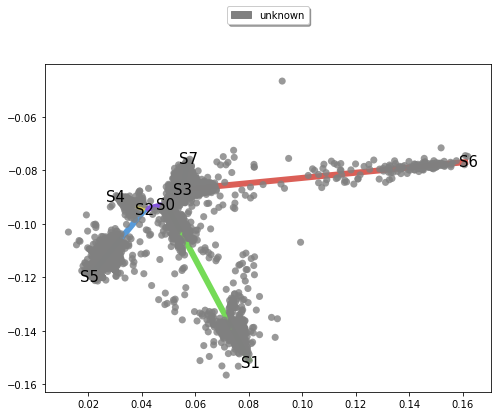

In [24]:
st.plot_flat_tree(adata)

Validate the learned structure by visualizing the branch assignment

Importing precomputed umap visualization ...
Importing precomputed umap visualization ...


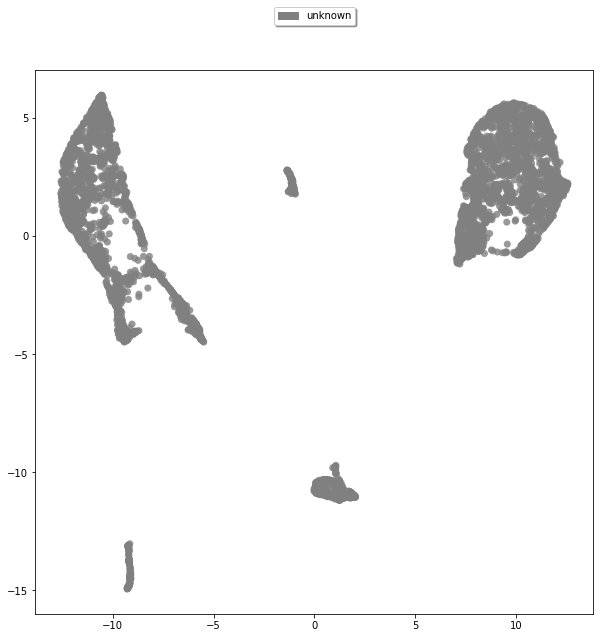

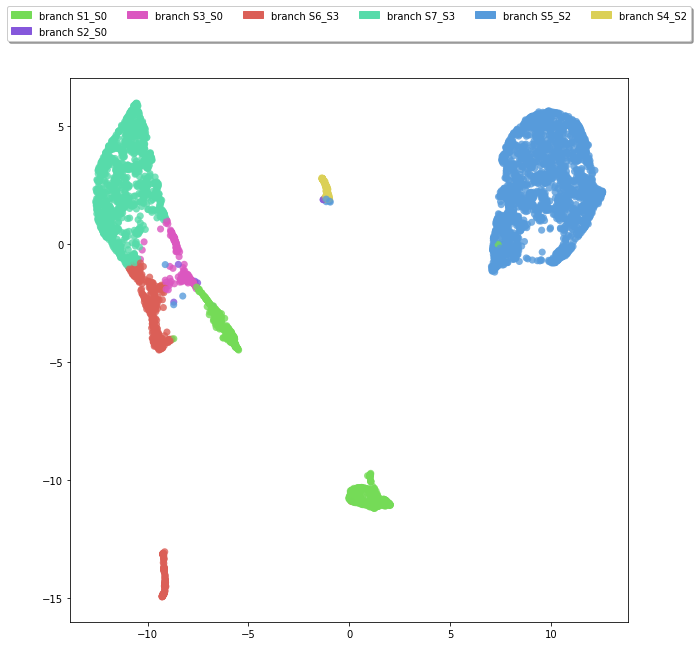

In [25]:
st.plot_visualization_2D(adata)
st.plot_visualization_2D(adata,color_by='branch',fig_legend_ncol=6)

**check parameters**  
`st.subwaymap_plot?`

By default **percentile_dist=95**, to make cells more conpact around the branches, try to **increase percentile_dist to beween 95 and 100**

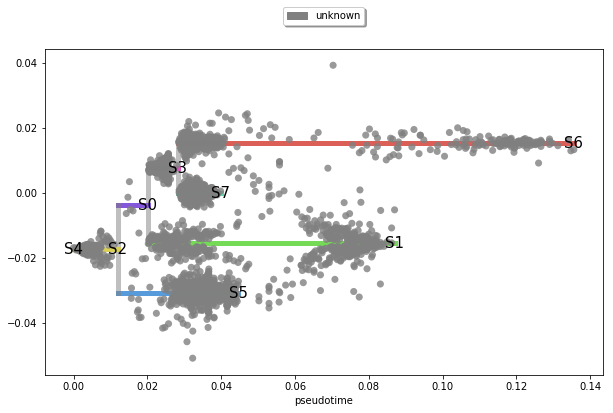

In [26]:
st.subwaymap_plot(adata,root='S4',fig_legend_ncol=6) 

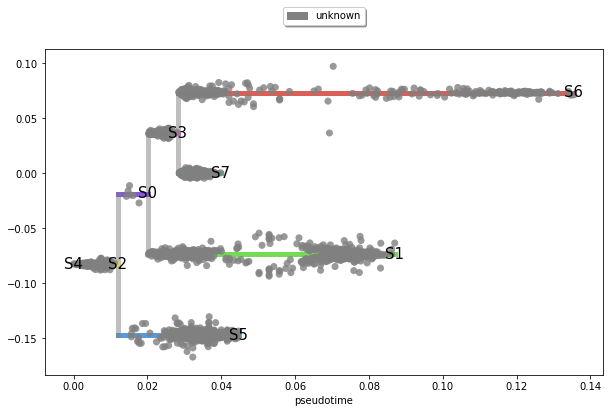

In [27]:
st.subwaymap_plot(adata,root='S4',fig_legend_ncol=6,percentile_dist=100) 

**check parameters**  
`st.stream_plot?`

By default **factor_min_win=2.0**, lowering it (between 1.0 and 2.0) can make smoother stream plot

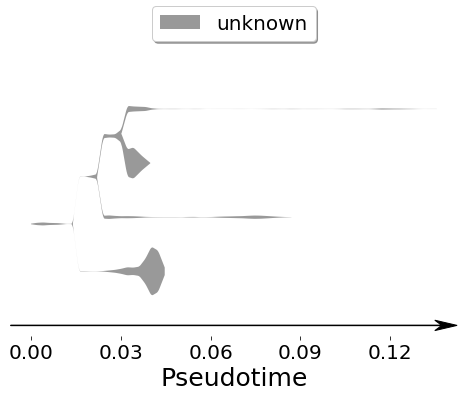

In [28]:
st.stream_plot(adata,root='S4',fig_legend_ncol=6,fig_size=(8,8))

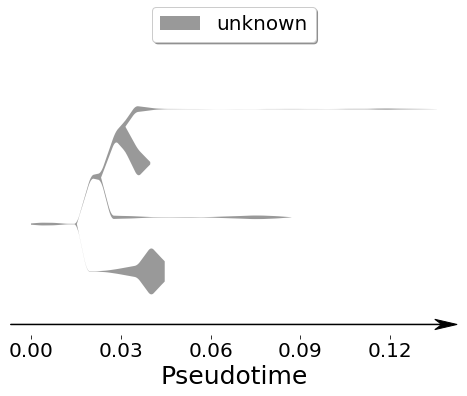

In [29]:
st.stream_plot(adata,root='S4',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2)

The order between **horizontal branches from the same parent node** has no meaning

Users can specify the order preference of nodes themselves by setting the parameter **'preference'**

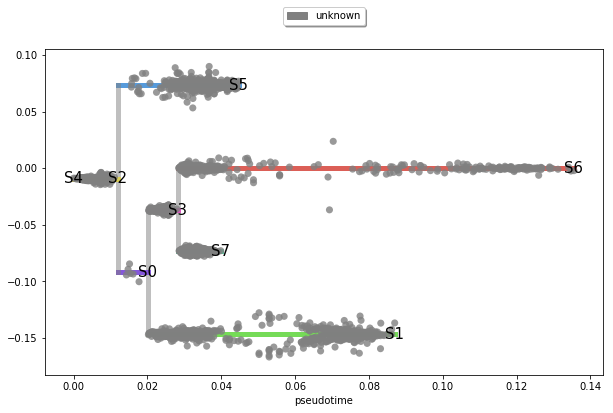

In [30]:
st.subwaymap_plot(adata,percentile_dist=100,root='S4',fig_legend_ncol=6,preference=['S5']) 

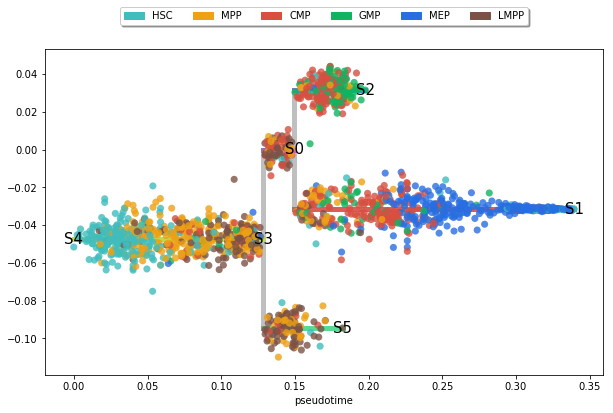

In [24]:
st.subwaymap_plot(adata,percentile_dist=100,root='S4',fig_legend_ncol=6,preference=['S2','S1']) 

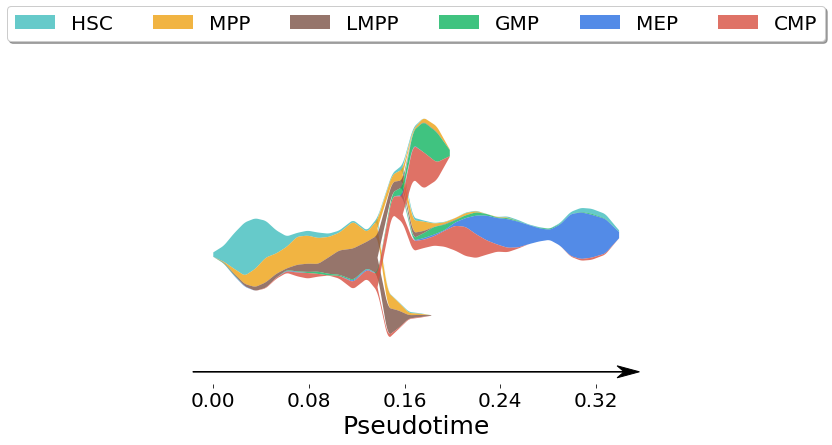

In [25]:
st.stream_plot(adata,root='S4',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.2,preference=['S2','S1'])

For stream plot with **'thin branches'**, log2 view of stream plot (by specifying **'flag_log_view=True'**) will help zoom in the thin branches with very few cells by log2 transformation and visualize the composition of cells on the thin branches  
**factor_zoomin**: suggested value 50~200

**This case is best illustrated in tutorial** [4.STREAM_scATAC-seq](https://nbviewer.jupyter.org/github/pinellolab/STREAM/blob/master/tutorial/4.STREAM_scATAC-seq.ipynb)

<img src="./img/log2_view_plots.png" alt="log2_view_plots" width=1000>

#### Visualize genes

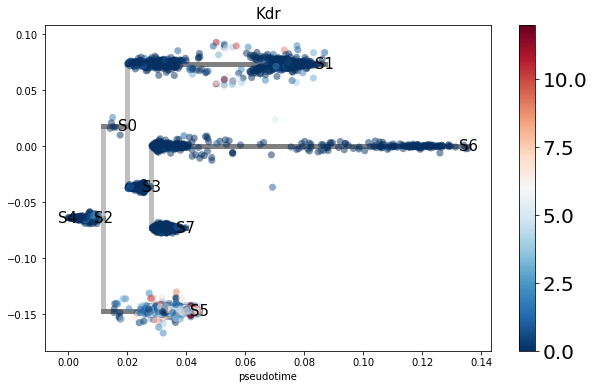

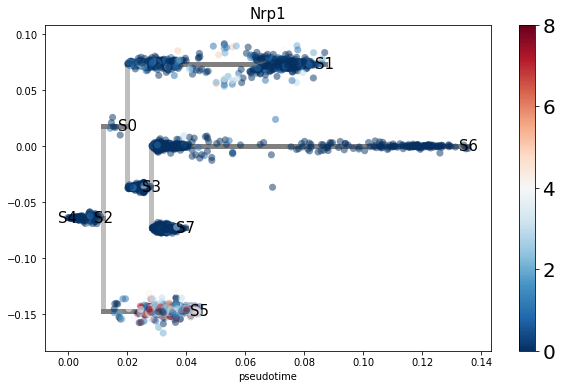

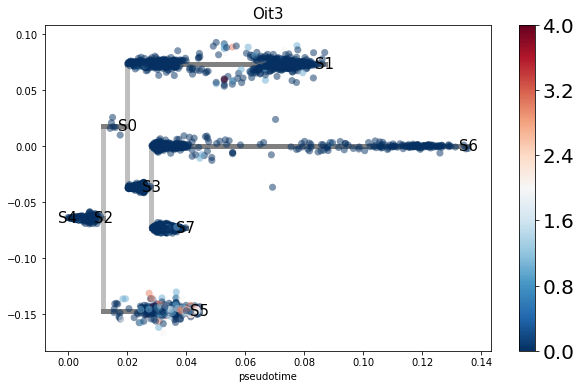

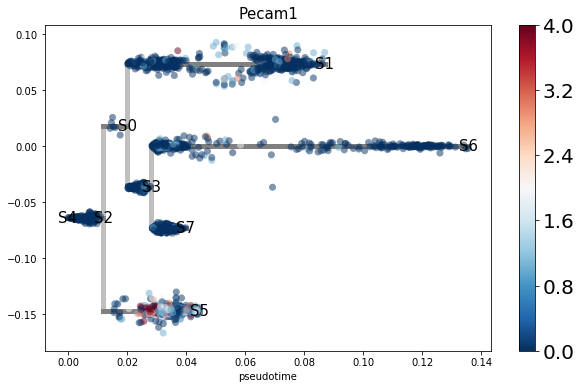

In [35]:
st.subwaymap_plot_gene(adata,percentile_dist=100,root='S4',preference=['S2','S1'],genes=['Pecam1', 'Nrp1', 'Kdr','Oit3']) 

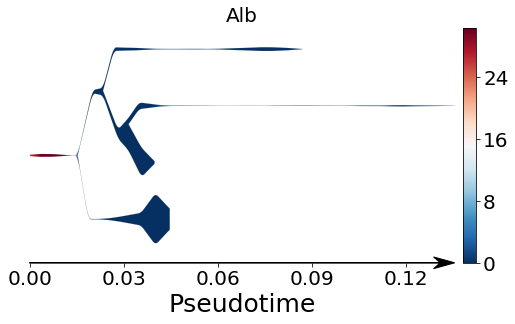

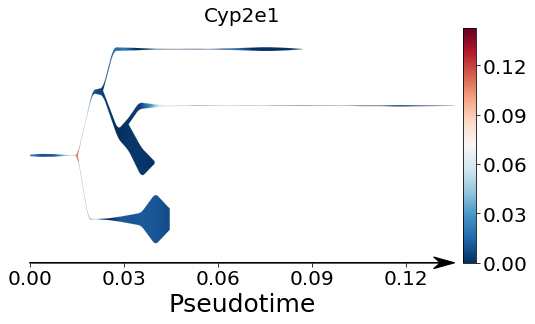

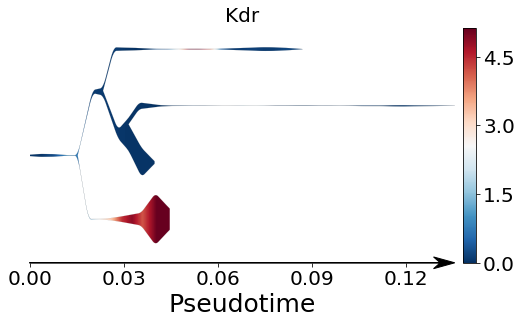

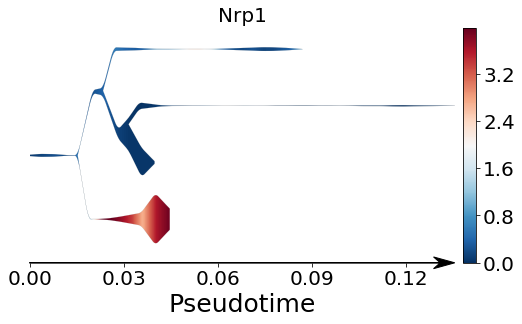

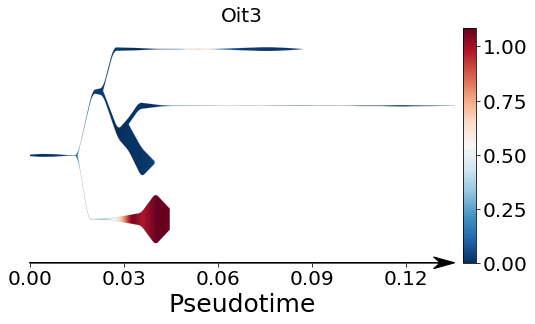

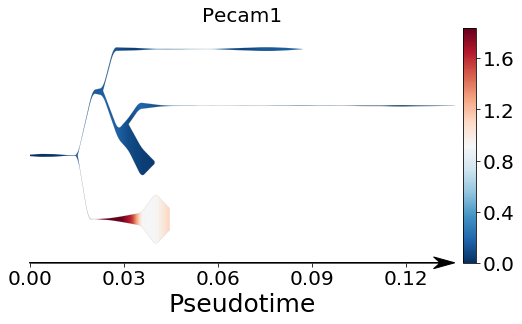

In [37]:
st.stream_plot_gene(adata,root='S4',fig_size=(8,8),factor_min_win=1.2,preference=['S2','S1'],genes=['Pecam1', 'Nrp1', 'Kdr','Oit3','Cyp2e1','Alb'])

**Marker gene detection part is a bit time-consuming, so please make sure the struture learned from previous steps is reasonble before running any maker gene detection steps**

**Also it's not always necessary to execute all three marker gene detection parts. Running one of them might be adequate already.**

#### 1.Detect marker genes for each leaf branch

**'preference'** is only used to adjust the order of comparions (in coordance with subway_map plot and stream plot), it will not affect the final detected genes

In [38]:
st.detect_leaf_genes(adata,root='S4',preference=['S2','S1'])

Minimum number of cells expressing genes: 5


KeyboardInterrupt: 

In [39]:
adata.uns['leaf_genes_all']

KeyError: 'leaf_genes_all'

#### 2.Detect transition gene for each branch

In [40]:
st.detect_transistion_genes(adata,root='S4',preference=['S2','S1'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...


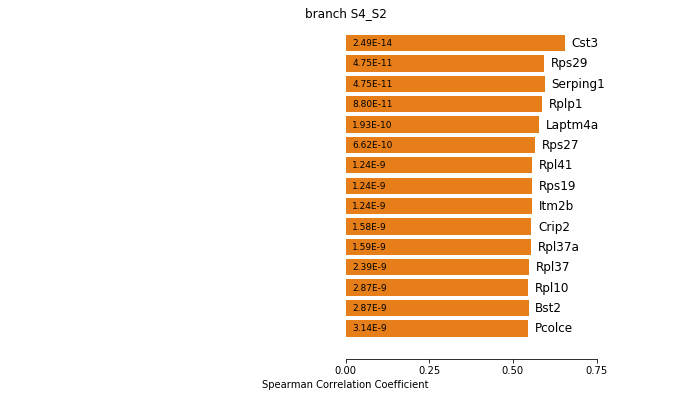

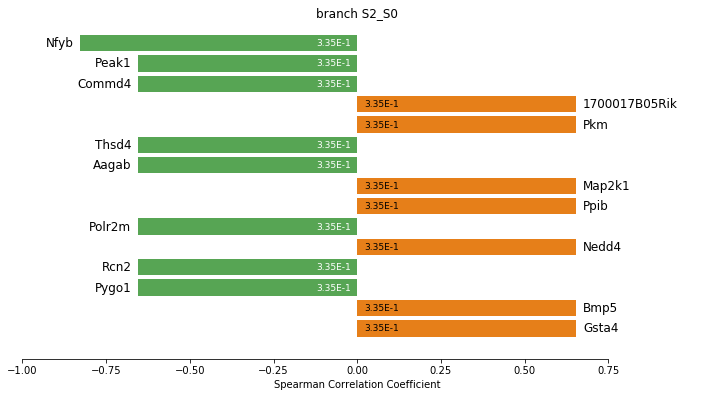

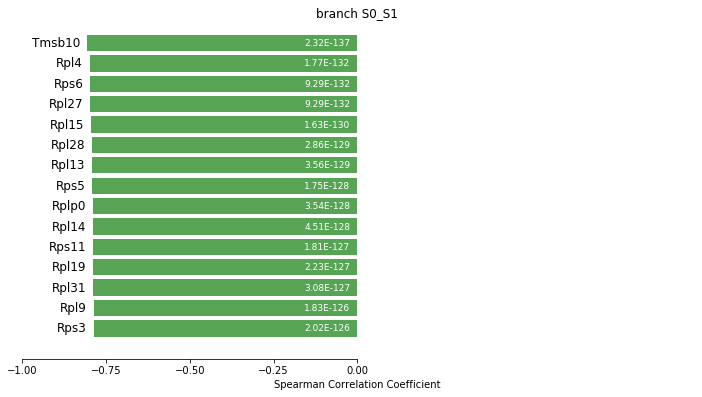

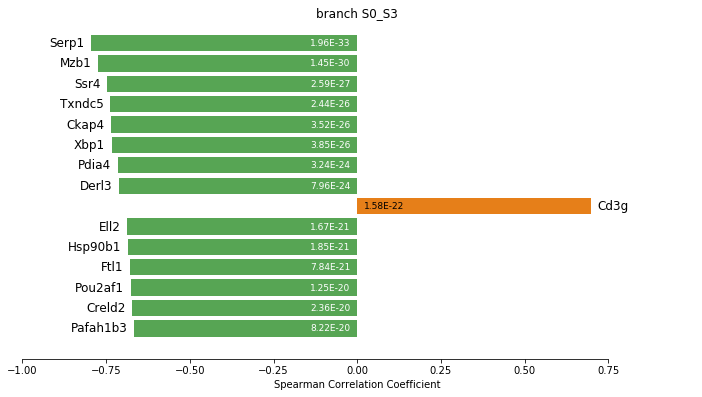

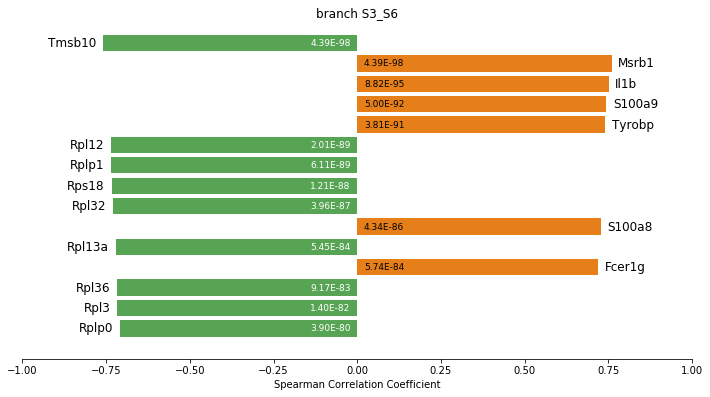

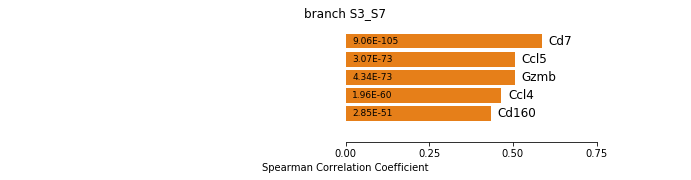

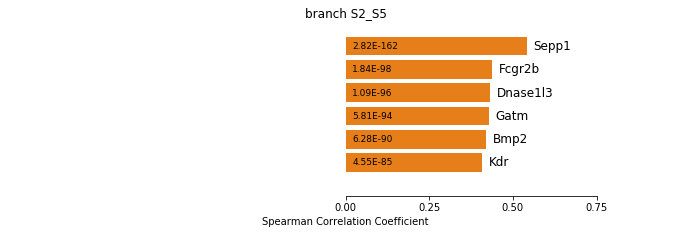

In [48]:
st.plot_transition_genes(adata)

#### 3.Detect differentially expressed genes between pairs of branches

In [41]:
st.detect_de_genes(adata,root='S4',preference=['S2','S1'])

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...
There are not sufficient cells (should be greater than 20) between branches S2_S0 and S0_S1. fold_change is calculated
There are not sufficient cells (should be greater than 20) between branches S2_S0 and S0_S3. fold_change is calculated
There are not sufficient cells (should be greater than 20) between branches S4_S2 and S2_S0. fold_change is calculated
There are not sufficient cells (should be greater than 20) between branches S2_S0 and S2_S5. fold_change is calculated


NameError: name 'dict_DE_greater' is not defined

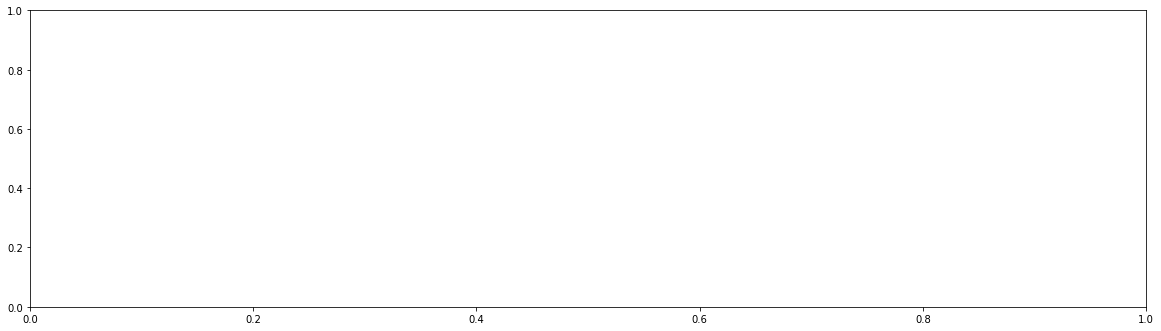

In [46]:
st.plot_de_genes(adata)

In [47]:
adata.obs

label label_color      n_counts  n_genes  node  \
0                                                                      
AAACCTGAGAAACCAT-1  unknown        gray   6184.560547      643    73   
AAACCTGAGAGTAATC-1  unknown        gray  11161.797852     1204    80   
AAACCTGAGATCCCAT-1  unknown        gray  10935.719727     1224     8   
AAACCTGAGTCTCGGC-1  unknown        gray  16270.428711     1973    21   
AAACCTGCACTCGACG-1  unknown        gray   8624.567383      897    55   
...                     ...         ...           ...      ...   ...   
TTTGTCAGTCCCTTGT-1  unknown        gray   9866.656250     1029     5   
TTTGTCAGTGCAGGTA-1  unknown        gray  16886.117188     2083    55   
TTTGTCAGTTCAGTAC-1  unknown        gray   8381.557617      844    11   
TTTGTCAGTTGCCTCT-1  unknown        gray  11390.566406     1239     0   
TTTGTCATCAGTACGT-1  unknown        gray   7276.286621      748    75   

                   branch_id branch_id_alias  branch_lam  branch_dist  \
0                                                                       
AAACCTGAGAAACCAT-1   (84, 4)        (S6, S3)    0.100394     0.000541   
AAACCTGAGAGTAATC-1  (80, 20)        (S5, S2)    0.001278     0.000649   
AAACCTGAGATCCCAT-1   (81, 4)        (S7, S3)    0.002994     0.001087   
AAACCTGAGTCTCGGC-1  (83, 20)        (S4, S2)    0.003181     0.001330   
AAACCTGCACTCGACG-1   (81, 4)        (S7, S3)    0.007092     0.000821   
...                      ...             ...         ...          ...   
TTTGTCAGTCCCTTGT-1  (80, 20)        (S5, S2)    0.004941     0.000358   
TTTGTCAGTGCAGGTA-1   (81, 4)        (S7, S3)    0.008320     0.003737   
TTTGTCAGTTCAGTAC-1  (80, 20)        (S5, S2)    0.008306     0.000617   
TTTGTCAGTTGCCTCT-1  (80, 20)        (S5, S2)    0.003731     0.000342   
TTTGTCATCAGTACGT-1   (84, 4)        (S6, S3)    0.100974     0.000383   

                    S0_pseudotime  S3_pseudotime  S5_pseudotime  \
0                                                                 
AAACCTGAGAAACCAT-1       0.015118       0.006989       0.055921   
AAACCTGAGAGTAATC-1       0.039525       0.047654       0.001278   
AAACCTGAGATCCCAT-1       0.016807       0.008678       0.057610   
AAACCTGAGTCTCGGC-1       0.016857       0.024985       0.041487   
AAACCTGCACTCGACG-1       0.012709       0.004581       0.053513   
...                           ...            ...            ...   
TTTGTCAGTCCCTTGT-1       0.035862       0.043991       0.004941   
TTTGTCAGTGCAGGTA-1       0.011481       0.003352       0.052284   
TTTGTCAGTTCAGTAC-1       0.032497       0.040626       0.008306   
TTTGTCAGTTGCCTCT-1       0.037072       0.045201       0.003731   
TTTGTCATCAGTACGT-1       0.014537       0.006409       0.055341   

                    S7_pseudotime  S1_pseudotime  S4_pseudotime  \
0                                                                 
AAACCTGAGAAACCAT-1       0.018662       0.082058       0.035156   
AAACCTGAGAGTAATC-1       0.059326       0.106466       0.043391   
AAACCTGAGATCCCAT-1       0.002994       0.083748       0.036845   
AAACCTGAGTCTCGGC-1       0.036658       0.083797       0.003181   
AAACCTGCACTCGACG-1       0.007092       0.079650       0.032747   
...                           ...            ...            ...   
TTTGTCAGTCCCTTGT-1       0.055663       0.102803       0.039727   
TTTGTCAGTGCAGGTA-1       0.008320       0.078422       0.031519   
TTTGTCAGTTCAGTAC-1       0.052298       0.099438       0.036362   
TTTGTCAGTTGCCTCT-1       0.056873       0.104013       0.040938   
TTTGTCATCAGTACGT-1       0.018081       0.081478       0.034575   

                    S2_pseudotime  S6_pseudotime  
0                                                 
AAACCTGAGAAACCAT-1       0.023204       0.100394  
AAACCTGAGAGTAATC-1       0.031439       0.155037  
AAACCTGAGATCCCAT-1       0.024893       0.116061  
AAACCTGAGTCTCGGC-1       0.008770       0.132368  
AAACCTGCACTCGACG-1       0.020796       0.111964  
...                           ... 

#### Additionally, STREAM can be also used to detect cell population-specific markers

In [42]:
st.find_marker(adata,ident='label')

Minimum number of cells expressing genes: 5
Importing precomputed scaled gene expression matrix ...
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At 

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabelare required
At least two distinctlabe

In [36]:
adata.uns['markers_label_all']

zscore H_statistic      H_pvalue           CMP           GMP  \
Atpif1    1.87094     893.907  5.54241e-191   8.12348e-73   8.26153e-35   
Cd34     -1.85017      834.97  3.14343e-178   2.6501e-119   1.03478e-65   
Cdk6     -1.75754     800.812  7.72125e-171   3.7432e-161  6.48728e-103   
Plac8    -1.58746      757.48  1.82323e-161  2.68676e-147  8.70888e-132   
Coro1a   -2.17012     750.798  5.08357e-160  2.22162e-104    2.9121e-58   
Tmsb4x   -2.17607     738.786  2.01398e-157  3.64224e-160  2.45213e-145   
Ifitm1   -1.89313     729.175  2.41235e-155   1.30812e-42   6.45965e-22   
Aqp1      2.20709     728.582  3.24156e-155  2.18777e-111   4.30517e-84   
Klf1      2.18968     712.128  1.17195e-151  6.25301e-100   2.07091e-78   
Adgrl4    -1.9542     711.041  2.01288e-151   8.05673e-63   1.66437e-32   
Lsp1      -1.7439     707.635  1.09743e-150   2.70573e-44   2.84436e-15   
Mfsd2b    2.07555     704.648  4.85534e-150   3.49271e-61   1.17493e-67   
Mt1       1.97966     700.796  3.30492e-149   1.20139e-86   1.10053e-24   
Ybx1       1.5379     687.853  2.07742e-146    3.8229e-36    3.8123e-09   
Gm15915   2.18317     684.213  1.27239e-145   3.31562e-82   6.68114e-79   
Blvrb     2.20124     681.419  5.11106e-145  3.64751e-106   4.14671e-75   
Car1      2.20952     681.184  5.74739e-145   2.17501e-97   7.00294e-76   
Flt3      1.77827     676.962  4.69962e-144   1.64417e-62   7.02012e-68   
Gata1     2.13447     673.615  2.48676e-143   5.92007e-77   2.47925e-61   
Limd2    -2.14911     673.321  2.87891e-143   4.55968e-65   2.70283e-54   
Tnfaip2   2.07229     671.904  5.82917e-143   7.73782e-85   2.44405e-41   
Pkm      -2.20776      671.34  7.71934e-143   9.59525e-91   2.31356e-76   
Tmem176b -2.18059     667.116  6.31795e-142   4.97506e-85   2.35613e-35   
Tspo2     2.21442     661.967  8.19867e-141   1.55493e-98   2.48546e-66   
Mpl       1.54315      649.49  4.08153e-138   2.28882e-88   1.52198e-68   
Atp1b2    2.22192     648.831  5.66568e-138  8.39175e-106   1.42065e-67   
Ces2g     2.20995     648.437  6.89049e-138   4.8454e-110    1.2726e-72   
Lcp1      -2.1392     644.047  6.12535e-137   1.01256e-74   6.46724e-65   
Npm1      1.88537     642.612  1.25123e-136   3.00793e-45   1.04225e-22   
Gpr171   -1.82918     641.945   1.7438e-136   4.78178e-53   4.89084e-20   
...           ...         ...           ...           ...           ...   
Marveld1  1.61038      30.719   1.06433e-05    0.00665474            -1   
Ppm1f     1.96573     30.6697   1.08843e-05    0.00240994            -1   
Slc16a2   2.09362     30.2338   1.32653e-05   6.57205e-06   0.000857278   
Accs     -2.09757      29.602   1.76617e-05   6.11347e-05   0.000561536   
Tmem43    1.96018     29.5609   1.79937e-05    0.00995874            -1   
Ifi205   -1.94707     28.7131   2.63941e-05   0.000872277   0.000872277   
Sema4a    2.15071     28.4296   2.99943e-05   8.96186e-05            -1   
Neu1      2.12997      28.385   3.06043e-05   7.15087e-06            -1   
Cog6      2.16994     27.7024   4.16124e-05   0.000161987    0.00158515   
Apol9b    2.07251     27.3802   4.80955e-05   0.000116203   0.000820155   
Akt3     -2.16582     26.8159    6.1949e-05   0.000267329    0.00557244   
Edc3      2.15744     26.4564   7.27693e-05   0.000701248    0.00108596   
Gm37642  -2.00501     26.4458   7.31148e-05   0.000240281    0.00397276   
Clec4b1   1.94138     26.3713   7.55922e-05     0.0026819            -1   
Ephx1     2.05233      26.267   7.91998e-05    0.00417336    0.00375373   
Layn     -2.06053     25.8574   9.51024e-05      0.002932    0.00319857   
Lcn2      2.18423     25.7291   0.000100704     0.0023335            -1   
F5        2.15251     24.7676   0.000154491     0.0018923            -1   
Mfsd8      2.1751      24.426   0.000179776    0.00054544    0.00333432   
Enpp1     2.17937     23.3113   0.000294309    0.00309364    0.00539995   
Gm10419   2.18959     23.1433   0.000316926     0.0033752    0.00367452   
Sh3tc1    -2.1796      22.842   0.00

#### Save results

In [43]:
st.write(adata)

#### Save web report (Optional)

Save the analysis result and interactively visualize it on STREAM website (http://stream.pinellolab.org/) or local STREAM_web docker image (https://github.com/pinellolab/STREAM_web)

**check parameters**  
`st.save_web_report?`

In [45]:
st.save_web_report(adata,fig_size=(8,8),n_genes=5,preference=['S2','S1'],factor_min_win=1.2,
                title='kkarri_chow_1_test_Steram1',
                description='This scRNA-seq dataset contains ~4000 cell from chow dataset with ~9000 genes coming from NASH paper.',
                starting_node='S4',command_used='1.STREAM_scRNA-seq_kk_chow.ipynb')

ValueError: Please run st.detect_leaf_genes(adata) before saving web report